In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [120]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 0. 데이터 확인

In [7]:
wine.isnull().sum() #null값은 없음.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.info() #object 변수도 없음 전부다 수치화된 데이터.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### 0-1. 변수명 확인

In [9]:
wine[wine.duplicated()] #중복 데이터가 240개!!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
wine.describe().loc[['min', 'max', '50%', 'mean']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023


#### 0-2. 상관계수 확인

<AxesSubplot:>

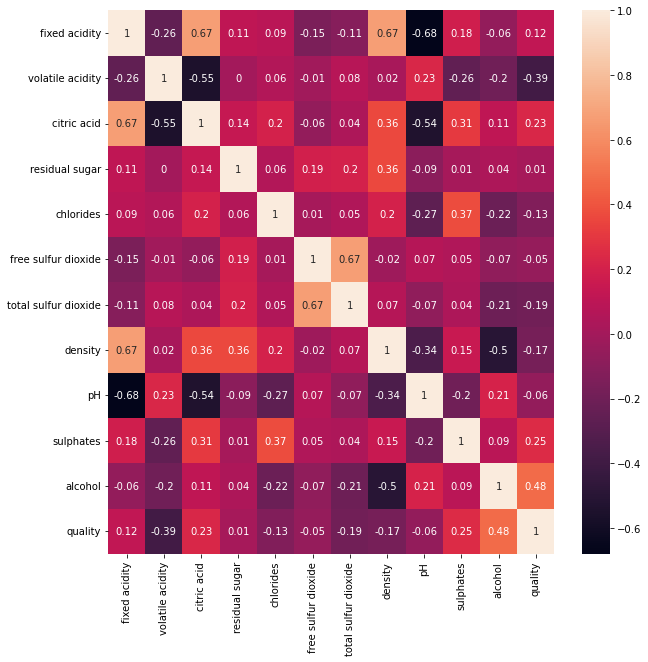

In [12]:
corr = wine.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

### 1. 전처리

In [13]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
wine['quality'] = np.where((wine['quality']== 7) | (wine['quality']==8),  'good', 'bad')

In [85]:
wine.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     bad        4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     bad        4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     good       4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     bad        4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      bad        3
                     

### 2. 모델 학습 및 정확도 측정

In [70]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer #속성값을 수치화 해주는~
from sklearn.metrics import classification_report

In [41]:
model = DecisionTreeClassifier()

In [42]:
x = wine.drop(['quality'], axis=1)

In [43]:
y= wine['quality']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1234, stratify=y)

In [45]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
model.score(x_train, y_train)

1.0

In [47]:
model.score (x_test, y_test)

0.88125

In [73]:
pred= model.predict(x_test)

In [74]:
binarizer = LabelBinarizer()

In [75]:
binarizer.fit(y_test)

LabelBinarizer()

In [76]:
f1_score(binarizer.transform(pred), binarizer.transform(y_test))

0.5957446808510639

In [77]:
f1_score(binarizer.transform(pred),binarizer.transform(y_test))

0.5957446808510639

In [80]:
f1_score(pred, y_test, average = 'weighted')

0.8770667718806017

In [60]:
f1_score(pred,y_test, pos_label='bad')

0.9304029304029304

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(pred, y_test, labels=['good','bad'])

array([[ 28,  23],
       [ 15, 254]], dtype=int64)

In [71]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         bad       0.92      0.94      0.93       269
        good       0.65      0.55      0.60        51

    accuracy                           0.88       320
   macro avg       0.78      0.75      0.76       320
weighted avg       0.87      0.88      0.88       320



In [65]:
f1_score(pred, y_test, average ='macro')

0.7630738056269972

In [67]:
model.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [68]:
model.feature_importances_

array([0.05478577, 0.08118789, 0.06422455, 0.07583104, 0.08554985,
       0.04832866, 0.06886608, 0.03741304, 0.10824969, 0.1238932 ,
       0.25167023])

In [72]:
pd.DataFrame(list(zip(model.feature_names_in_,model.feature_importances_)),
             columns = ['Feature','importance']).sort_values('importance', ascending=False)

,Feature,importance
10,alcohol,0.251670
9,sulphates,0.123893
8,pH,0.108250
4,chlorides,0.085550
1,volatile acidity,0.081188
3,residual sugar,0.075831
6,total sulfur dioxide,0.068866
2,citric acid,0.064225
0,fixed acidity,0.054786
5,free sulfur dioxide,0.048329


In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

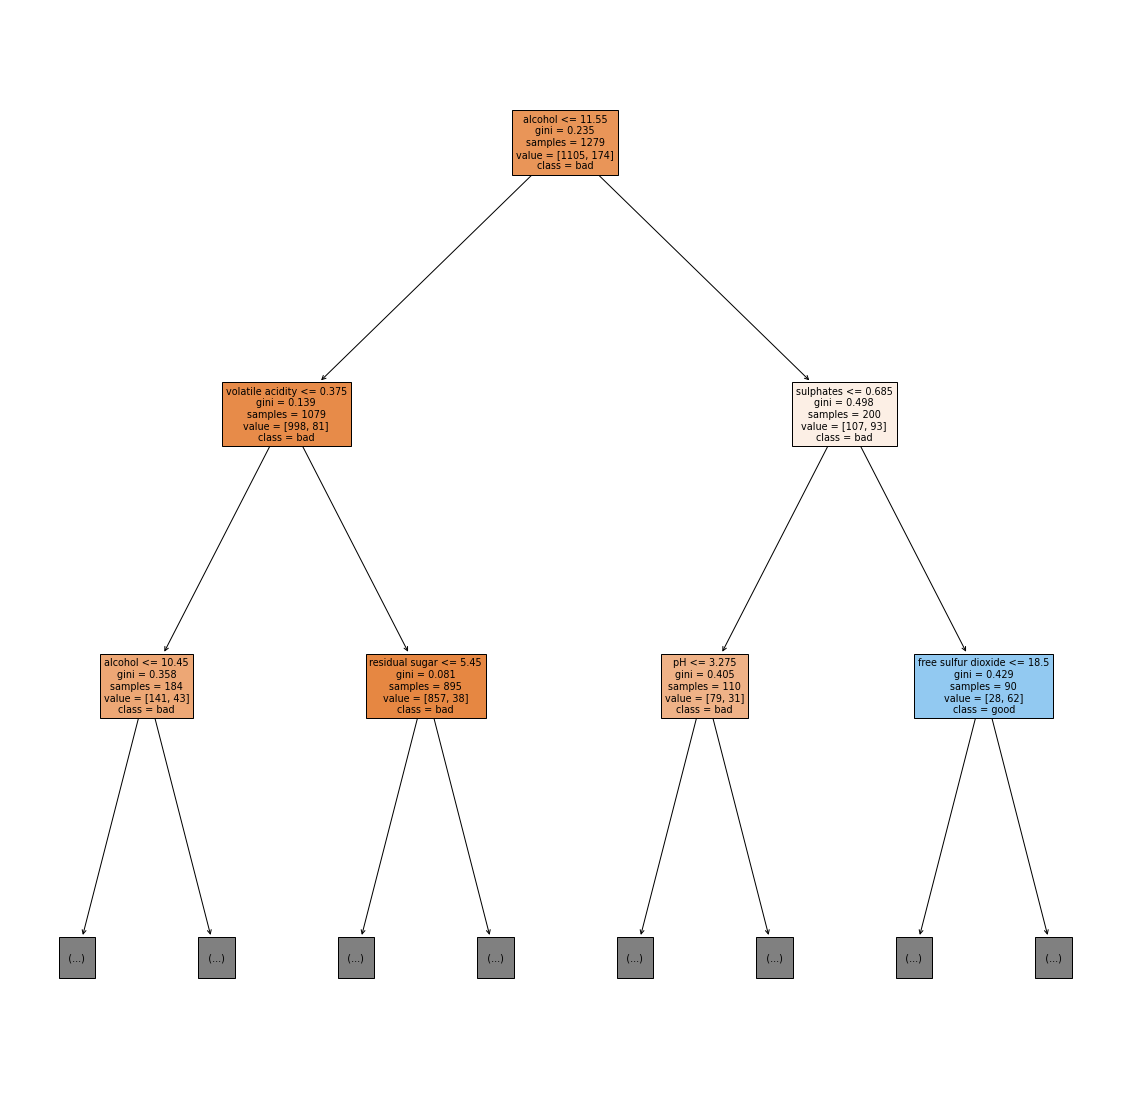

In [87]:
plt.figure(figsize=(20,20))
plot_tree(model,feature_names=x.columns, class_names = ['bad','good'], filled=True, max_depth=2)
plt.show()

In [93]:
from sklearn.tree import export_graphviz
import graphviz

In [94]:
dot_data = export_graphviz(model, feature_names=x.columns, class_names =['bad','good'], filled=True, rounded=True)

In [95]:
graph = graphviz.Source(dot_data)

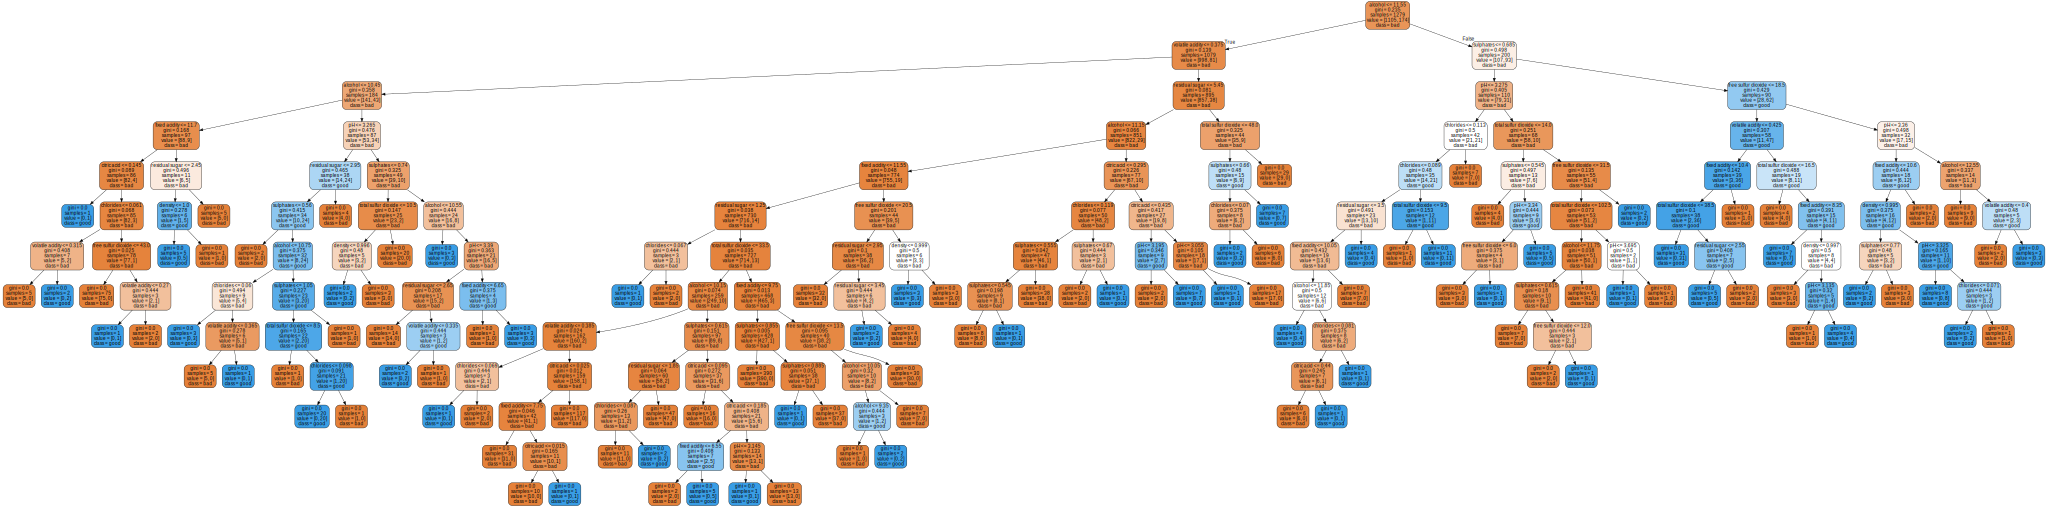

In [97]:
graph

In [ ]:
real=wine.iloc[100]

In [ ]:
list(real)

### 3. 실제 데이터를 통한 검정

In [ ]:
real =[8.3, 0.61, 0.3, 2.1, 0.084, 11.0, 50.0, 0.9972, 3.4, 0.61, 10.2]

In [ ]:
real = np.array(real).reshape(1,-1)

In [ ]:
real

In [ ]:
wine.columns

In [ ]:
df = pd.DataFrame(data = real, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [ ]:
df

In [ ]:
model

In [ ]:
predict = model.predict(df)

In [ ]:
predict

In [ ]:
if predict >6 :
    print('이 와인은 고등급입니다.')
else :
    print('이 와인은 저등급입니다')

------------------------

# 앙상블

In [142]:
model = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=0)

In [132]:
model_list =[('DT', model), ('LR', model2), ('SVC', model3)]

In [133]:
vc_model = VotingClassifier(estimators=model_list)

In [134]:
vc_model.fit(x_train, y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('LR', LogisticRegression()),
                             ('SVC', SVC(probability=0))])

In [135]:
vc_pred = vc_model.predict(x_test)

In [136]:
f1_score(vc_pred, y_test, pos_label='good')

0.19607843137254904

In [137]:
vc_model.score(x_test,y_test)

0.871875

In [141]:
for name, model in model_list :
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(name, score)

DT 0.88125
LR 0.846875
SVC 0.86875


In [143]:
model = DecisionTreeClassifier()
model2 = DecisionTreeClassifier(max_depth=3)
model3 = DecisionTreeClassifier(criterion='entropy')

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc = RandomForestClassifier(n_estimators=10)

In [150]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [151]:
rfc.score(x_train,y_train)

0.9921813917122753

In [152]:
rfc.score(x_test, y_test)

0.903125

In [153]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [168]:
abc = AdaBoostClassifier(learning_rate=0.5)
gbc = GradientBoostingClassifier(learning_rate=0.2)

In [169]:
model_list2 = [('ABC' , abc), ('GBC' , gbc)]

In [170]:
for name, model in model_list2 :
    model.fit(x_train, y_train)
    score= model.score(x_train, y_train)
    print(name, score)


ABC 0.9022673964034402
GBC 0.9906176700547302
